In [79]:
import numpy as np
import matplotlib.pyplot as plt

In [80]:
class PegasosSVM:
    def __init__(self, lambda_param=0.01, max_iter=1000):
        self.lambda_param = lambda_param
        self.max_iter = max_iter
        self.weights = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        for t in range(1, self.max_iter + 1):
            idx = np.random.randint(0, n_samples)
            x_i = X[idx]
            y_i = y[idx]
            eta_t = 1 / (self.lambda_param * t)
            margin = y_i * (np.dot(self.weights, x_i))
            if margin < 1:
                self.weights = (1 - eta_t * self.lambda_param) * self.weights + eta_t * y_i * x_i
            else:
                self.weights = (1 - eta_t * self.lambda_param) * self.weights

            self.weights = np.minimum(1, (1 / np.sqrt(self.lambda_param)) / np.linalg.norm(self.weights)) * self.weights

    def predict(self, X):
        linear_output = np.dot(X, self.weights)
        return np.sign(linear_output)

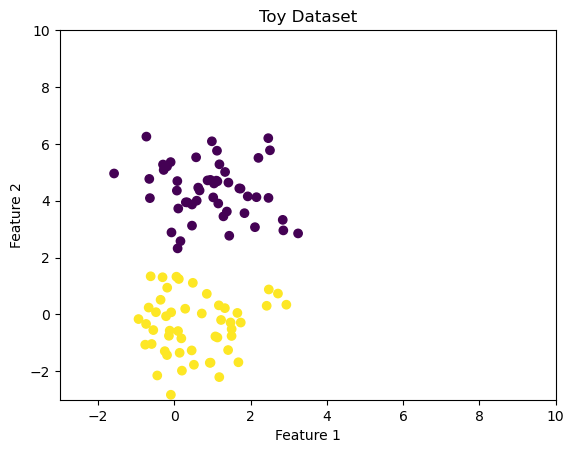

In [81]:

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)
y = np.where(y == 0, -1, y)
X[y == 0] = X[y == 0] + 1.5
X[y == 1] = X[y == 1] - 1.5

X = np.append(X, np.ones((X.shape[0], 1)), axis=1)
y = y*2 - 1

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlim((-3, 10))
plt.ylim((-3, 10))
plt.title('Toy Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [82]:
model = PegasosSVM(lambda_param=0.1, max_iter=1000)
model.fit(X, y)

print("Weights:", model.weights)

Weights: [ 0.0291229  -0.54042222  1.01430975]


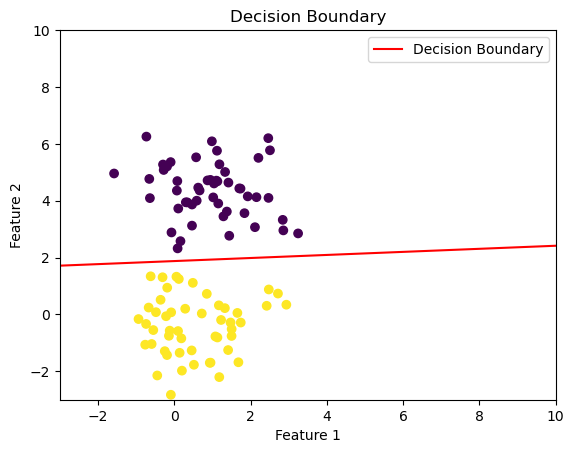

In [83]:
# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlim((-3, 10))
plt.ylim((-3, 10))

# Decision boundary is defined by w[0]*x + w[1]*y + w[2] = 0
# Rearranging for y: y = (-w[0]/w[1])*x - w[2]/w[1]
w = model.weights
x_boundary = np.array([-3, 10])
if w[1]!=0:
  y_boundary = (-w[0]/w[1])*x_boundary - w[2]/w[1]
  plt.plot(x_boundary, y_boundary, color='red', label='Decision Boundary')

plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()